# **CHAPTER 06. 차원 축소**

## **01. 차원 축소(Dimension Reduction) 개요**

- **대표적인 차원 축소 알고리즘: PCA, LDA, SVD, NMF**

- **차원 축소**
  1. **정의**: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
  2. **특징**  
     - 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어져 **희소(sparse)한 구조**를 가지게 됨
     - 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 **예측 신뢰도**가 떨어짐
     - 피처가 많을 경우 **개별 피처 간에 상관관계**가 높을 가능성이 큼
     - 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 **다중 공선성** 문제로 모델의 예측 성능이 저하됨
  3. **장점**  
     - 더 직관적으로 데이터 해석 가능
     - 학습 데이터 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있음

- 일반적으로 차원 축소는 **피처 선택**(feature selection)과 **피처 추출**(feature extraction)로 나눌 수 있음
  1. **피처 선택**
     - 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택
  2. **피처 추출**
     - 기존의 피처를 저차원의 중요 피처로 압축해서 추출
     - 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출
     - 새롭게 추출된 중요 피처는 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 됨
     - ex. 학생을 평가하는 다양한 요소인 모의고사 성적, 종합 내신성적, 수능성적, 봉사활동, 대외활동, 수상경력을 학업 성취도, 커뮤니케이션 능력, 문제 해결력과 같은 더 함축적인 요약 특성으로 추출
     - 이러한 함축적인 피처 추출은 기존 피처가 전혀 인지하기 어려웠던 **잠재적인 요소**(Latent Factor)를 추출하는 것을 의미함
     - 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 의미가 있음  

- **차원 축소 알고리즘 PCA, SVD, NMF**
  - 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘
  - 매우 많은 차원을 가지고 있는 **이미지**나 **텍스트**에서 차원 축소를 통해 잠재적인 의미를 찾아 주는 데 이 알고리즘이 활용됨
  - **예시1**
    - 매우 많은 픽셀로 이루어진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행
    - 이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 **과적합 영향력이 작아져서** 오히려 원본 데이터로 예측하는 것보다 **예측 성능을 끌어 올릴 수 있음**
  - **예시2**
    - 텍스트 문서의 숨겨진 의미를 추출하는 데 차원 축소 알고리즘 사용
    - 문서 내 단어들의 구성에서 숨겨져 있는 **시맨틱**(Semantic) 의미나 **토픽**(Topic)을 잠재 요소로 간주하고 찾아냄
    - SVD와 NMF는 이러한 시맨틱 토픽 모델링을 위한 기반 알고리즘으로 사용됨

## **02. PCA(Principal Component Analysis)**

### **PCA 개요**

- PCA는 가장 대표적인 차원 축소 기법
- 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소
- 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되게 함
- 이를 위해 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소 (분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)  
  => 이것이 PCA의 주성분이 됨

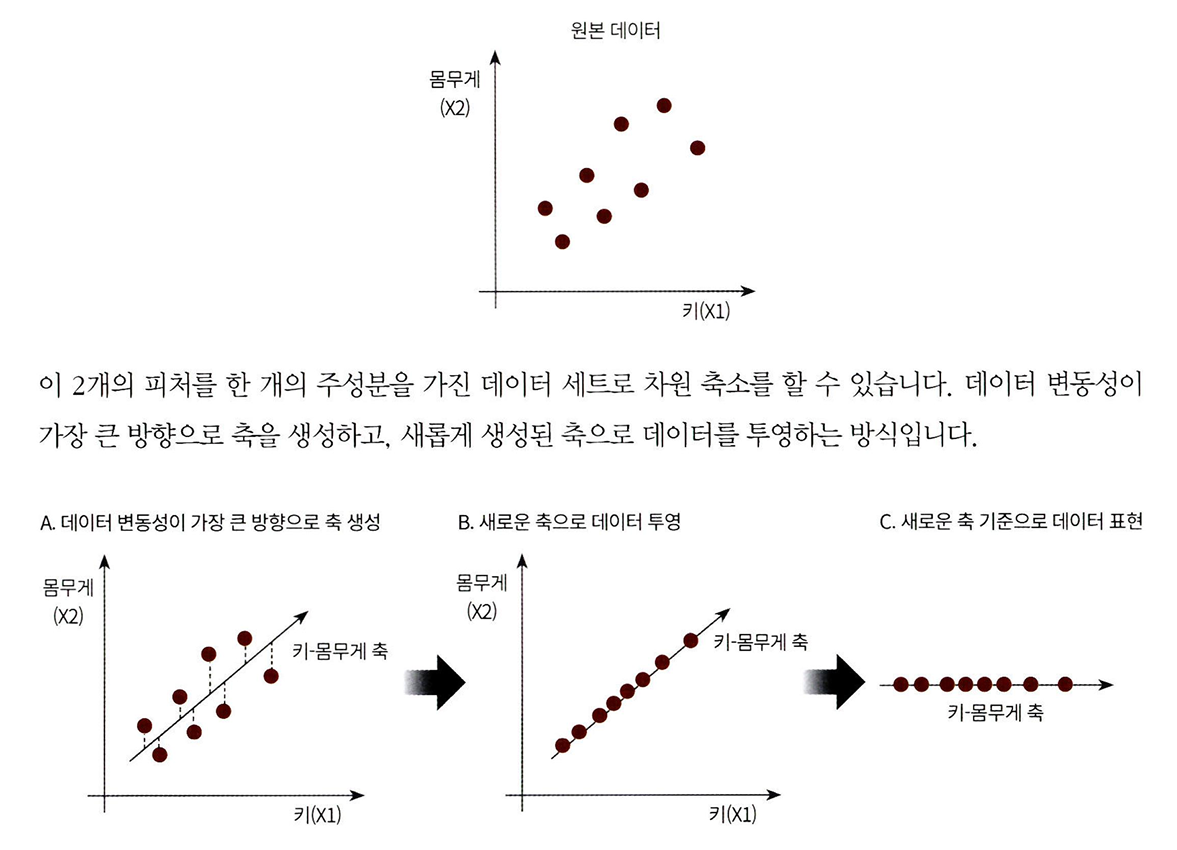

1. 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축 생성
2. 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 선택
3. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 선택
4. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨

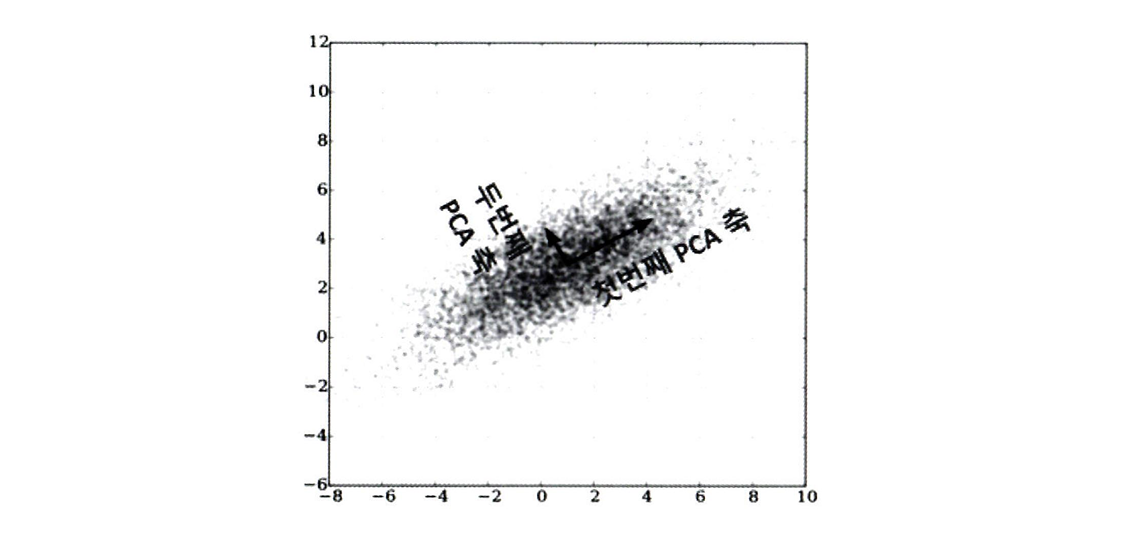

- PCA (주성분 분석)는 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법

- PCA를 **선형 대수 관점에서 해석**해 보면
  - 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고,
  - 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것
  - 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄
  - 고윳값(eigenvalue): 고유벡터의 크기, 입력 데이터의 분산

- **선형 변환**
  - 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것을 의미함
  - 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념으로도 볼 수 있으며, 이 경우 이 행렬을 공간으로 가정함

- **공분산 행렬**
  - 분산: 한 개의 특정한 변수의 데이터 변동
  - 공분산: 두 변수 간의 변동
  - 공분산 행렬: 여러 변수와 관련된 공분산을 포함하는 정방형 랭렬

- **고유벡터**
  - 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터
  - Ax = ax (A는 행렬, x는 고유벡터, a는 스칼라값)
  - 고유벡터는 여러 개 존재
  - 정방 향렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음
    - ex. 2x2 행렬은 최대 2개의 고유벡터를, 3x3 행렬은 최대 3개의 고유벡터를 가질 수 있음
  - 고유벡터는 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용됨

- 공분산 행렬은 정방행렬(Diagonal Matrix)이자 대칭행렬(Symmetric Matrix)
  - 정방행렬은 열과 행이 같은 행렬
  - 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬 (A^T=A)이 대칭행렬
  - 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방행렬로 대각화할 수 있음
- 입력 데이터의 공분산 행렬을 C라고 하면 공분산행렬의 특성으로 인해 다음과 같이 분해 가능
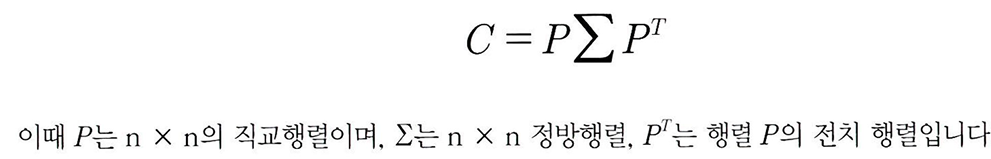
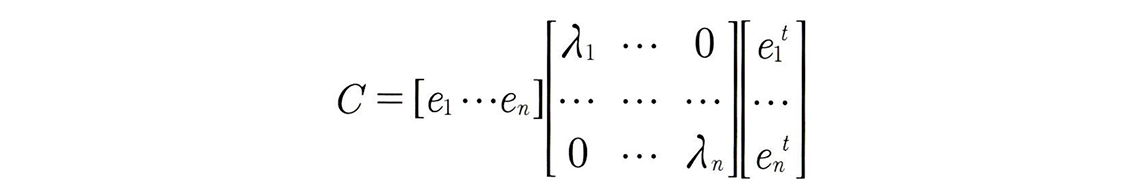
- 즉, 공분산 C는 [고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬]로 분해됨
- 정리  
  **1. 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며**  
  **2. 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA**
- PCA의 일반적인 수행 절차
  1. 입력 데이터 세트의 공분산 행렬 생성
  2. 공분산 행렬의 고유벡터와 고유값 계산
  3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼의 고유벡터 추출
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터 변환
- PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것

- 붓꽃(Iris) 데이터 세트는 sepal lenght, sepal width, petal length, petal width의 4개의 속성을 가짐
- 이 4개 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라지는지 확인해보자

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포되어 있는지 2차원으로 시각화해보자
- 2차원으로 표현하므로 두 개의 속성인 sepal length와 sepal width를 X축, Y축으로 해 품종 데이터 분포를 나타냄

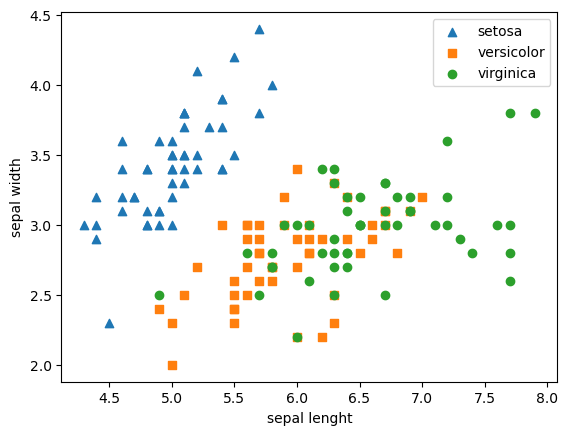

In [5]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal lenght')
plt.ylabel('sepal width')
plt.show()

- setosa 품종: sepal width가 3.0보다 크고 sepal length가 6.0 이하인 곳에 일정하게 분포
- versicolor, virginica 품종: sepal width와 sepal length 조건만으로는 분류가 어려움  

- 이제 PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화
- 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링해야 함
- PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
- 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환
- 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 iris 데이터 세트의 속성값들을 변환

In [6]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 겅규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

- 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환
- 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공함
- PCA 클래스는 생성 파라미터로 n_components를 입력받음
- n_components는 PCA로 변환할 차원의 수를 의미하므로 여기서는 2로 설정
- 이후에 fit(입력 데이터 세트)과 transform(입력 데이터 세트)을 호출해 PCA로 변환 수행

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


- PCA 객체의 transform() 메서드를 호출해 원본 데이터 세트를 (150,2)의 데이터 세트로 iris_pca 객체 변수로 반환

In [9]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- 이제 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화
- pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 해서 붓꽃 품종이 어떻게 분포되는지 확인

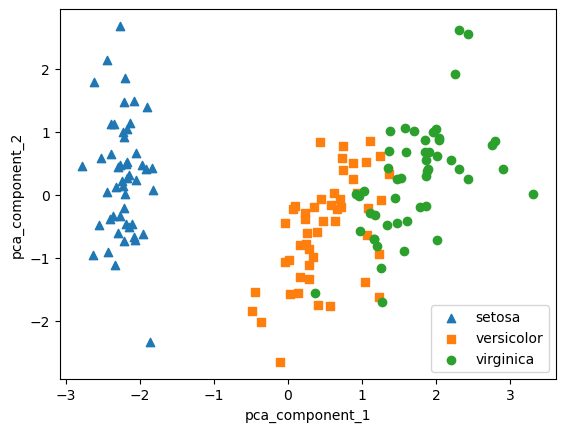

In [10]:
# setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 X축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

- PCA로 변환한 후에도 pca_component_1 축을 기반으로  setosa 품종은 명확하게 구분 가능
- versicolor와 virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분됨  
  => PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문

- PCA Component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보자
- PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성: 전체 변동성에서 개별 PCA component별로 차지하는 변동성 비율을 제공

In [12]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


- 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9% 차지
- 두 번째 PCA 변환 요소인 pca_component_2이 전체 변동성의 약 22.8% 차지
- 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95% 설명 가능

- 이번에는 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교해보자
- Estimator는 RandomForestClassifier를 이용하고 cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교함

In [13]:
# 원본 붓꽃 데이터에 랜덤 포레스트 적용
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [16]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


- 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 떨어질 수밖에 없음
- 4개의 속성이 2개로, 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있음

- 다음으로는 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교해보자

In [24]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel(r"C:\Users\이희원\OneDrive\바탕 화면\EWHA\4-1\ESAA\data\credit_card.xls", header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


- default payment next month 속성: target 값으로 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0
- 원본 데이터 세트에 PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0 칼럼을 PAY_1로 칼럼명 변환
- default payment next month 칼럼도 칼럼명이 너무 길기 때문에 default로 칼럼명 변경
- target 속성인 default 칼럼을 y_target 변수로 별도로 저장
- 피처 데이터는 이 default 칼럼을 제외한 별도의 DataFrame으로 만들기

In [25]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

- 이 데이터 세트에는 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높음
- DataFrame의 corr()를 이용해 각 속성 간의 상관도를 구한 뒤 이를 Seaborn의 heatmap으로 시각화

<Axes: >

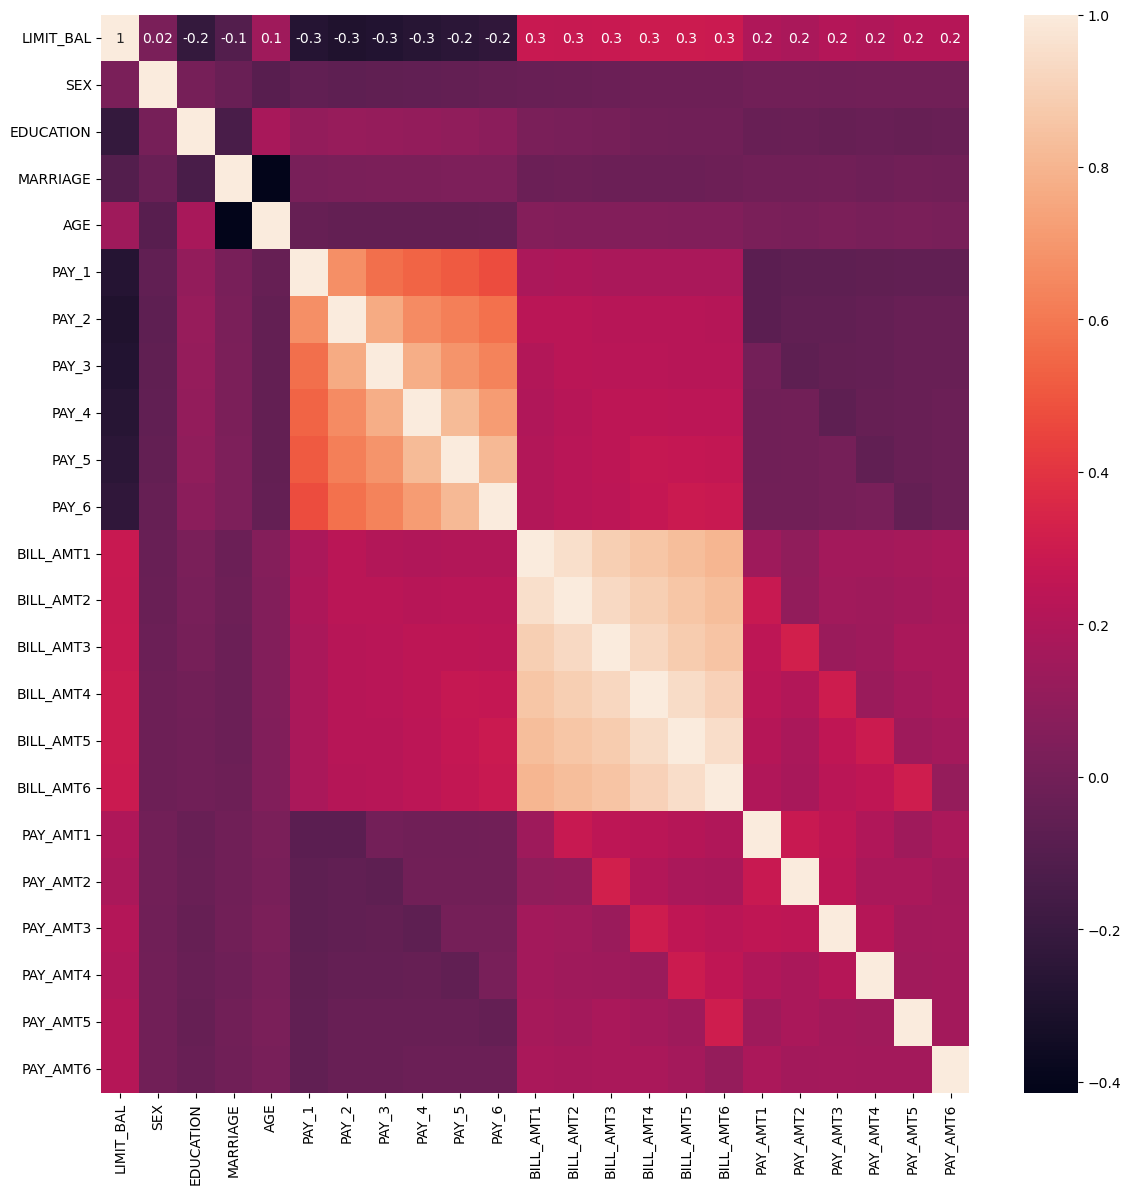

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

- BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음
- 이보다는 낮지만 PAY_1 ~ PAY_6까지의 속성도 상관도가 높음
- 높은 상관도를 가진 속성들은 소수의 PCA 만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있음
- BILL_AMT1 ~ BILL_AMT6까지 6개의 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성을 알아보자

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


- 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명 가능
- 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높음

- 이번에는 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교해보자
- 먼저 원본 데이터 세트에 랜덤 포레스트를 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측

In [30]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold 세트별 정확도:', scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold 세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


- 이번에는 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해서 동일하고 분류 예측 적용

In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandarScaler wjrdyd
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:', scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.7913 0.7971 0.8022]
PCA 변환 데이터 세트 평균 정확도:0.7969


- 전체 23개 속성의 약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생함

- PCA는 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용 가능
- 이보다 더 활발하게 적용되는 영역은 컴퓨터 비전(Computer Vision) 분야
- 특히 얼굴 인식의 경우 Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용하는 경우가 많음

## **03. LDA(Linear Discriminant Analysis)**

### **LDA 개요**

- LDA는 선형 판별 분석법으로 불리며, PCA와 매우 유사함
- PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법
- 중요한 차이점은, LDA는 지도학습의 분류에서 사용하기 쉽도록 **개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소**한다는 것
- PCA는 입력 데이터의 변동성이 가장 큰 축을 찾았지만, LDA는 **입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축**을 찾음

- LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원 축소
- 다음 그림은 좋은 클래스 분리를 위해 클래스 간 분산이 크고 클래스 내부 분산이 작은 것을 표현한 것
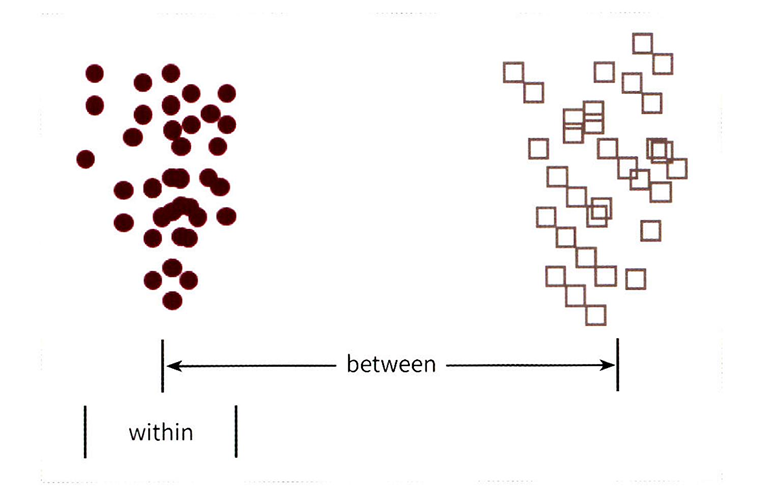

- 일반적으로 **LDA를 구하는 스텝**은 PCA와 유사하나 가장 큰 차이점은 공분산 행렬이 아니라 위에 설명한 클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점
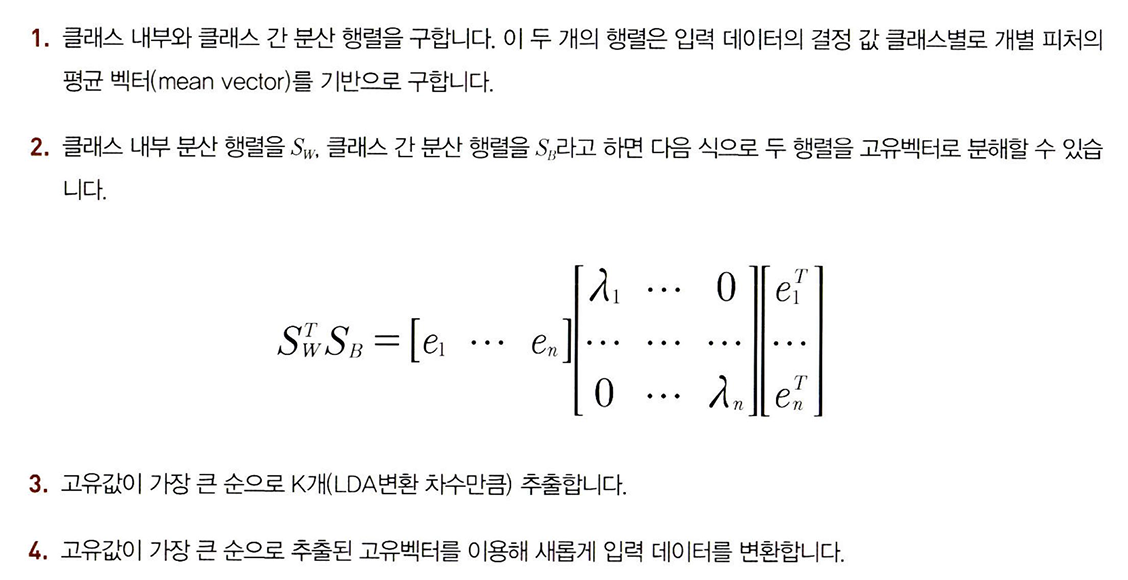

### **붓꽃 데이터 세트에 LDA 적용하기**

- 붓꽃 데이터 세트를 사이킷런의 LDA를 이용해 변환하고 그 결과를 품종별로 시각화
- 사이킷런은 LDA를 LinearDiscriminantAnalysis 클래스로 제공함
- 붓꽃 데이터 세트를 로드한 뒤 표준 정규 분포로 스케일링

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

- 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환하기
- PCA와 다르게 LDA에서 유의해야할 점: LDA는 실제로는 PCA와 다르게 지도학습임. 즉, 클래스의 결정값이 변환 시에 필요함.
  => 다음 lda 객체의 fit() 메서드를 호출할 때 결정값이 입력됐음에 유의

In [34]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


- 이제 LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현해보자

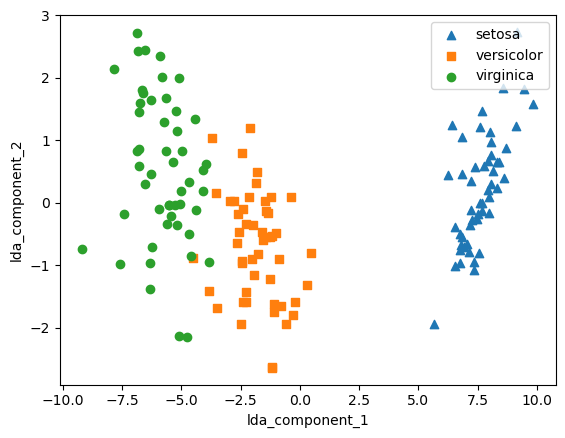

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginia는 2, 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()